In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from nn_utilities import *
from fd_model_nn import FD_Network
from utilities import *
from tensorflow.keras.callbacks import EarlyStopping

# ATTEMPTS WITH VARIOUS DIFFERENT SCENARIOS

In [3]:
corridor_30_results = {'(1,)': {'tr': (0.01262977423146367, 0.0004127846182246546), 'val': (0.013154482580721378, 0.00046061958140566716), 'test': (0.01288361999290932, 0.00018229439834367304)}, 
'(2,)': {'tr': (0.011538316439837219, 0.0004941108979969975), 'val': (0.01249925512820482, 0.0006318710590386238), 'test': (0.012508606474898787, 0.0002469853850752613)}, 
'(3,)': {'tr': (0.011129431296139957, 0.0005970115740365477), 'val': (0.012320313565433026, 0.0006322344205738093), 'test': (0.01239412819759469, 0.00021392860968342934)}, 
'(4, 2)': {'tr': (0.010888327900320292, 0.0005645756167551163), 'val': (0.012081360649317504, 0.0004218669603715056), 'test': (0.012369421973580237, 0.0005166539995045363)}, 
'(5, 2)': {'tr': (0.010493993125855921, 0.000835649478515386), 'val': (0.011810790300369262, 0.0008214068201585462), 'test': (0.012149790975389287, 0.00017063005462694236)}, 
'(5, 3)': {'tr': (0.01040523873642087, 0.000896238969922755), 'val': (0.011774615943431854, 0.0006561110549846406), 'test': (0.012044799717730852, 0.00029100208053976263)}, 
'(6, 3)': {'tr': (0.010356380194425582, 0.0004923185513636355), 'val': (0.01185028439387679, 0.0004095531187095662), 'test': (0.012083048750901115, 0.0001470802890341071)}, 
'(10, 4)': {'tr': (0.00905075192451477, 0.00041083540622956606), 'val': (0.010977945439517498, 0.0006262889727623127), 'test': (0.01159878536373124, 0.00014952305229616762)}}

corridor_85_results = {'(1,)': {'tr': (0.045258586704730985, 0.004853406766732973), 'val': (0.04714435026049614, 0.004653697406037759), 'test': (0.04686351530840396, 0.0012961715061691429)}, 
'(2,)': {'tr': (0.03719027779996395, 0.0020733957764011005), 'val': (0.041013209708034994, 0.0023950303734451657), 'test': (0.041472892633610745, 0.0024322010449302914)}, 
'(3,)': {'tr': (0.034038560874760156, 0.0013176987634252566), 'val': (0.03938843499869109, 0.0014865264094550156), 'test': (0.03914595563880523, 0.0010876265935449074)}, 
'(4, 2)': {'tr': (0.03526925183832645, 0.0029871246019426367), 'val': (0.04105438970029355, 0.0023958553187249138), 'test': (0.04126933727288883, 0.002845698267115585)}, 
'(5, 2)': {'tr': (0.035543992817401886, 0.0037010336212553643), 'val': (0.04197082627564668, 0.0025311766537130707), 'test': (0.04235170498124496, 0.00310823593982254)}, 
'(5, 3)': {'tr': (0.0334813929721713, 0.0037666412204319824), 'val': (0.041099048890173434, 0.003189935635059386), 'test': (0.04175731243589502, 0.003266454835106925)}, 
'(6, 3)': {'tr': (0.03116175480186939, 0.0022358561594462813), 'val': (0.03927014149725437, 0.002838615402109067), 'test': (0.039632171653358556, 0.001673111008447824)}, 
'(10, 4)': {'tr': (0.03036436103284359, 0.0047435348802268695), 'val': (0.0395459621399641, 0.003676904672583768), 'test': (0.03933931185179666, 0.002598055735067817)}}

corridor_140_results = {'(1,)': {'tr': (0.04291036047041416, 0.005824563471412332), 'val': (0.04382776025682687, 0.006394844256567953), 'test': (0.04436331604526039, 0.005793175051406907)}, 
'(2,)': {'tr': (0.030837520547211172, 0.004751342825048035), 'val': (0.033473274633288384, 0.0033827028892333627), 'test': (0.03378857116046191, 0.0039617804044175505)}, 
'(3,)': {'tr': (0.026549312584102154, 0.0025887104995903575), 'val': (0.030712138414382934, 0.00239518947015756), 'test': (0.030885775140055527, 0.0028191616118913632)}, 
'(4, 2)': {'tr': (0.029781400188803674, 0.0077334687329517525), 'val': (0.0341630595549941, 0.006559810710432661), 'test': (0.03564499776092213, 0.008119999565798364)}, 
'(5, 2)': {'tr': (0.026851211041212082, 0.007672321045244769), 'val': (0.030404813252389428, 0.004847593028122708), 'test': (0.03220185558130239, 0.005889302402353403)}, 
'(5, 3)': {'tr': (0.0270224241912365, 0.006174432484881431), 'val': (0.02984722938388586, 0.0038025682267235944), 'test': (0.03257381413735577, 0.006320370030920377)}, 
'(6, 3)': {'tr': (0.026414520479738718, 0.00683934028421603), 'val': (0.031423465646803386, 0.004522380706006448), 'test': (0.031857456997041, 0.005524142998706357)}, 
'(10, 4)': {'tr': (0.02273985404521227, 0.004553421199614998), 'val': (0.02864274427294731, 0.004004773533224363), 'test': (0.029942636128836318, 0.004020629164617923)}}

bottleneck_070_results = {'(1,)': {'tr': (0.04955769553780556, 0.0057570421608399685), 'val': (0.05123388793319463, 0.005096320416198529), 'test': (0.051791704269027836, 0.005582774144924822)}, 
'(2,)': {'tr': (0.04184448003768921, 0.004760314561714955), 'val': (0.045550852119922644, 0.0046212267515334735), 'test': (0.04491133585904681, 0.0022928527407057274)}, 
'(3,)': {'tr': (0.04102290675044059, 0.003348045017959455), 'val': (0.04824198216199875, 0.004444882233662878), 'test': (0.04584651970424176, 0.002920595092481756)}, 
'(4, 2)': {'tr': (0.04031206876039505, 0.0051648797471331685), 'val': (0.048427933976054195, 0.0037716492903911523), 'test': (0.04719023609986878, 0.004526066784584657)}, 
'(5, 2)': {'tr': (0.03668047532439232, 0.003667154431939146), 'val': (0.04531076699495316, 0.0025808096847436896), 'test': (0.0461659374304043, 0.0027352878110425798)}, 
'(5, 3)': {'tr': (0.04162880904972553, 0.007151998469464794), 'val': (0.049127314463257785, 0.005513828520265613), 'test': (0.049083456967275084, 0.005650612198688121)}, 
'(6, 3)': {'tr': (0.037646884098649025, 0.005999453764399783), 'val': (0.04634510710835457, 0.004201980591786483), 'test': (0.04620908804838612, 0.0035137353907239953)}, 
'(10, 4)': {'tr': (0.036670266091823576, 0.00472639424911708), 'val': (0.04604802552610636, 0.003957607023497358), 'test': (0.045713807815980285, 0.003483159691551754)}}

bottleneck_120_results = {'(1,)': {'tr': (0.045476525351405145, 0.0034633781661747636), 'val': (0.047511987984180444, 0.0035279194455248527), 'test': (0.048413375369388105, 0.002522003039164646)}, 
'(2,)': {'tr': (0.04224360480904579, 0.003506859080301349), 'val': (0.046193650886416436, 0.0031272720054366793), 'test': (0.04625286046127057, 0.0022125453627997982)}, 
'(3,)': {'tr': (0.03858987495303154, 0.002671119954889929), 'val': (0.04430860459804535, 0.0027157726234042193), 'test': (0.04470461421467471, 0.0010606345597737859)}, 
'(4, 2)': {'tr': (0.0394828798621893, 0.00517953882272561), 'val': (0.04747614659368992, 0.004553359946353866), 'test': (0.048298225549071205, 0.004111722579294067)}, 
'(5, 2)': {'tr': (0.0381364968419075, 0.004438003066403954), 'val': (0.04704980656504631, 0.003722231935710756), 'test': (0.04857316286432897, 0.0035492809359175402)}, 
'(5, 3)': {'tr': (0.03634794570505619, 0.003913022708673728), 'val': (0.04499102778732776, 0.0034655888864897574), 'test': (0.04650701782928805, 0.0031319673718845963)}, 
'(6, 3)': {'tr': (0.038392788544297216, 0.006043361708867561), 'val': (0.04624851040542126, 0.004497909805504629), 'test': (0.04844175237181768, 0.004853182351753698)}, 
'(10, 4)': {'tr': (0.03385196726769209, 0.003615533945624023), 'val': (0.044425726979970936, 0.0027250517699852323), 'test': (0.04527146680715299, 0.0028587616390998542)}}

bottleneck_180_results = {'(1,)': {'tr': (0.033769665695726876, 0.002552604748078953), 'val': (0.03528949625790119, 0.002585573285757077), 'test': (0.03504237054569127, 0.002002002665577862)}, 
'(2,)': {'tr': (0.030869273804128166, 0.002305927721896861), 'val': (0.03384587962180376, 0.0023586936013644546), 'test': (0.03243234185262013, 0.0006866033363514358)}, 
'(3,)': {'tr': (0.027929570898413664, 0.0029547061687996393), 'val': (0.031504483260214336, 0.002699934739993706), 'test': (0.031684836193923004, 0.001045656878796912)}, 
'(4, 2)': {'tr': (0.030895430967211722, 0.0038421324431520865), 'val': (0.034928697943687435, 0.002954860923083888), 'test': (0.03501300235703424, 0.0028131718999108908)}, 
'(5, 2)': {'tr': (0.027379923760890962, 0.0038991080896199188), 'val': (0.03222468722611666, 0.0028437898469709), 'test': (0.033922969614848156, 0.002292811623967401)}, 
'(5, 3)': {'tr': (0.027455363385379315, 0.002900168557128682), 'val': (0.03304103620350361, 0.0026987548264617244), 'test': (0.033113406288243635, 0.0016651353914404774)}, 
'(6, 3)': {'tr': (0.028664349503815172, 0.0032454153274787075), 'val': (0.03402393605560064, 0.002724596515028621), 'test': (0.034047556292832945, 0.001860900325841806)}, 
'(10, 4)': {'tr': (0.024174300655722618, 0.0031015519602549694), 'val': (0.03141755178570747, 0.0028595141966270103), 'test': (0.03214170199275125, 0.0013953394628899662)}}


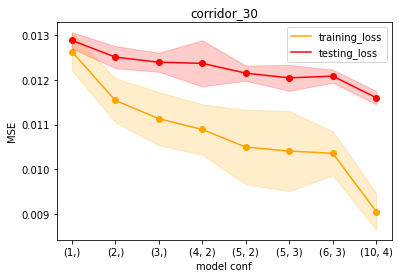

In [4]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_30_results)
plot_results(corridor_30_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_30")

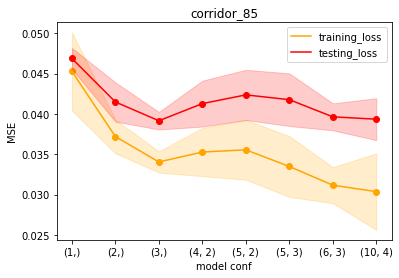

In [5]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_85_results)
plot_results(corridor_85_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_85")

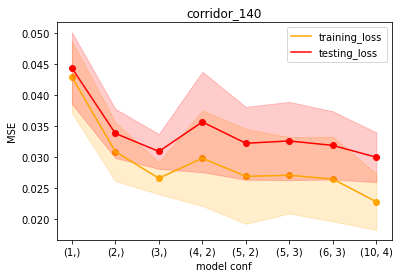

In [6]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_140_results)
plot_results(corridor_140_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_140")

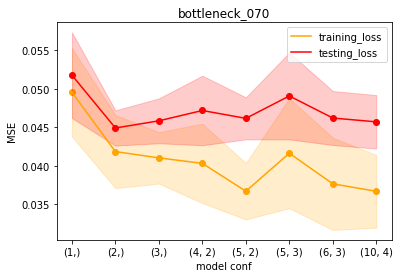

In [7]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(bottleneck_070_results)
plot_results(bottleneck_070_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="bottleneck_070")

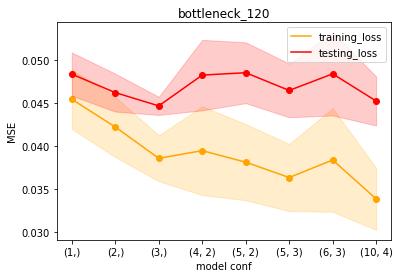

In [8]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(bottleneck_120_results)
plot_results(bottleneck_120_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="bottleneck_120")

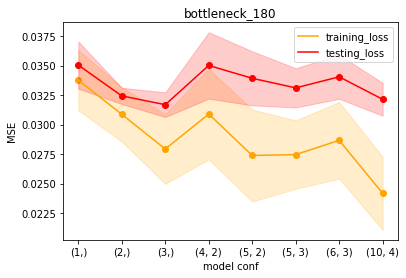

In [9]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(bottleneck_180_results)
plot_results(bottleneck_180_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="bottleneck_180")

# TRAINING WITH TANH ATTEMPT

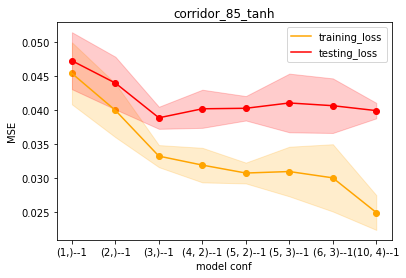

In [3]:
corridor_85_tanh = {'(1,)--1': {'tr': (0.04538934625685215, 0.004546113217142043), 'val': (0.04688903339207172, 0.004139930341636447), 'test': (0.04724346083651699, 0.0041748485303315696)}, 
'(2,)--1': {'tr': (0.03996741741895676, 0.003939493572668216), 'val': (0.04208512231707573, 0.0037857139685198845), 'test': (0.04396623553441259, 0.003855840402353869)}, 
'(3,)--1': {'tr': (0.033254373073577884, 0.0016183172785357114), 'val': (0.03581776317209005, 0.0016809751101175394), 'test': (0.0388742571906313, 0.0016181146998960946)}, 
'(4, 2)--1': {'tr': (0.0319386875256896, 0.002533381308766448), 'val': (0.03471112187951804, 0.002676035545844782), 'test': (0.04019584373974823, 0.0027958832812850424)}, 
'(5, 2)--1': {'tr': (0.030775768086314204, 0.001525641452186864), 'val': (0.03418474204838275, 0.0016678144932272814), 'test': (0.040268926766937045, 0.0017893828544877934)}, 
'(5, 3)--1': {'tr': (0.030995323099195955, 0.003636889719047746), 'val': (0.034404303133487704, 0.003703380151352631), 'test': (0.04104898418543457, 0.0043004496675966225)}, 
'(6, 3)--1': {'tr': (0.03006844084709883, 0.004930970512225417), 'val': (0.03374400999397039, 0.005241590983536983), 'test': (0.04064973978174522, 0.00400232575431274)}, 
'(10, 4)--1': {'tr': (0.024985238872468472, 0.002550132321077727), 'val': (0.029999200254678733, 0.0033004466818679786), 'test': (0.03992726215985491, 0.0011337007289416881)}}
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_85_tanh)
plot_results(corridor_85_tanh, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_85_tanh")

# ATTEMPTING TRAINING WITH LESS BUT BIGGER BOOTSTRAP

In [7]:
corridor_30_results = {'(1,)--1': {'tr': (0.012035354860126971, 0.00024274557914741776), 'val': (0.012093623988330365, 0.00026112932631411497), 'test': (0.012255919891507587, 8.076177044833239e-05)}, 
'(2,)--1': {'tr': (0.01139880370348692, 0.0003115806558627333), 'val': (0.011485397256910803, 0.0002987539259316774), 'test': (0.011746717413471816, 7.855043608413813e-05)}, 
'(3,)--1': {'tr': (0.010513622015714643, 0.00019314172260136974), 'val': (0.010665095224976539, 0.00023094852595212072), 'test': (0.010997041281086525, 0.0002072889261612442)}, 
'(4, 2)--1': {'tr': (0.010116741582751273, 0.00022785106268880567), 'val': (0.010279912054538726, 0.0001992364894384876), 'test': (0.010806119038677302, 0.00014731968340773899)}, 
'(5, 2)--1': {'tr': (0.009745912216603755, 0.00021460841699375992), 'val': (0.0099610585719347, 0.0002166254005262801), 'test': (0.01068908432132042, 7.276881910682926e-05)}, 
'(5, 3)--1': {'tr': (0.009543275460600853, 0.00025203018163794073), 'val': (0.009753200709819793, 0.00025447347116596634), 'test': (0.010664735584322706, 0.0001676133656829782)}, 
'(6, 3)--1': {'tr': (0.009352241717278957, 0.0002761391022679299), 'val': (0.009602799899876117, 0.00029616225058171113), 'test': (0.010514232169870349, 0.00012265234256234503)}, 
'(10, 4)--1': {'tr': (0.008645275719463826, 0.0001933890321482595), 'val': (0.008917657826095817, 0.00022901121414811674), 'test': (0.010162107002366815, 5.6155954208722244e-05)}}


corridor_85_results = {'(1,)--1': {'tr': (0.044118597507476806, 0.0003447616984820135), 'val': (0.0444775502383709, 0.0003397815761564276), 'test': (0.044199565485318594, 6.448890742201556e-05)}, 
'(2,)--1': {'tr': (0.03616531789302826, 0.000635683990976198), 'val': (0.03660601824522018, 0.0006409484954137527), 'test': (0.036450561868342404, 0.0003414132335344664)}, 
'(3,)--1': {'tr': (0.03317148372530937, 0.0006030648122942577), 'val': (0.0336221844702959, 0.0007064975979264133), 'test': (0.03371640485840095, 0.000683607900231011)}, 
'(4, 2)--1': {'tr': (0.03197320461273194, 0.00066565428404766), 'val': (0.032592006698250776, 0.0008188785620162674), 'test': (0.032499724356003866, 0.0006456990659941896)}, 
'(5, 2)--1': {'tr': (0.03079611770808697, 0.0007809982586729088), 'val': (0.03144960798323154, 0.0008282638811093613), 'test': (0.03169929390585047, 0.00029622945523924405)}, 
'(5, 3)--1': {'tr': (0.030863573849201197, 0.0008615968679297208), 'val': (0.03160637997090817, 0.0009011695609183696), 'test': (0.032496757769126985, 0.0006907030078058757)}, 
'(6, 3)--1': {'tr': (0.02939890995621681, 0.001272194720790352), 'val': (0.0302059468626976, 0.0012869454189731032), 'test': (0.030708300208260146, 0.0009472875946102732)}, 
'(10, 4)--1': {'tr': (0.026664268076419827, 0.00059355662524345), 'val': (0.027698560431599618, 0.000618560415658986), 'test': (0.029600256119866535, 0.000668032379579542)}}


corridor_140_results = {'(1,)--1': {'tr': (0.03254011735320091, 0.0005133265825325873), 'val': (0.032866866290569306, 0.0004931436968144355), 'test': (0.032829915825491676, 0.00041419819591577883)}, 
'(2,)--1': {'tr': (0.02567591443657875, 0.0014422974748419415), 'val': (0.026132350042462348, 0.001467377620620947), 'test': (0.026506020076406355, 0.0010597727075230075)}, 
'(3,)--1': {'tr': (0.02389676935970783, 0.0007830412152790455), 'val': (0.02439511626958847, 0.0007958682863860276), 'test': (0.024768106709757702, 0.0004721435114299825)}, 
'(4, 2)--1': {'tr': (0.021550854668021202, 0.0009237317340962984), 'val': (0.022124533355236058, 0.0008523950999028965), 'test': (0.02294707798453605, 0.000493695855639984)}, 
'(5, 2)--1': {'tr': (0.020464632809162144, 0.0008823897442739664), 'val': (0.0210543567687273, 0.0009038111039965453), 'test': (0.022290703507501928, 0.0005326910555493954)}, 
'(5, 3)--1': {'tr': (0.022173933535814285, 0.0019245691235831247), 'val': (0.022777798622846606, 0.001905193625809797), 'test': (0.02341487295838942, 0.001307214799074658)}, 
'(6, 3)--1': {'tr': (0.020610452368855475, 0.0005625197805477743), 'val': (0.021254102364182473, 0.0005730103016748771), 'test': (0.02220418583562619, 0.00034298003956146603)}, 
'(10, 4)--1': {'tr': (0.02006119877099991, 0.0005855734591342284), 'val': (0.020796176940202714, 0.0006249897009414789), 'test': (0.02204507631932589, 0.0005677013893287088)}}

bottleneck_070_results = {'(1,)--1': {'tr': (0.04282266855239868, 0.0010926049776525673), 'val': (0.043190644681453706, 0.0010710560917635288), 'test': (0.04241645710274615, 0.00035366966470846804)}, 
'(2,)--1': {'tr': (0.041680121421813966, 0.0015329175425450236), 'val': (0.04225654050707817, 0.0014705292148765186), 'test': (0.041580412149497856, 0.0006794145202305544)}, 
'(3,)--1': {'tr': (0.03558185175061226, 0.0018021948591473733), 'val': (0.03622334465384484, 0.001801652580129682), 'test': (0.03601344387840162, 0.0006502702104708559)}, 
'(4, 2)--1': {'tr': (0.03588698223233223, 0.002432776441556519), 'val': (0.03682182475924492, 0.0023455623595920977), 'test': (0.03662482064265078, 0.001647083939533601)}, 
'(5, 2)--1': {'tr': (0.035290073156356815, 0.0012474612446523067), 'val': (0.0362446565926075, 0.0012547296558219165), 'test': (0.03666640115271327, 0.0016980231366508036)}, 
'(5, 3)--1': {'tr': (0.03677989974617958, 0.0016047809410735094), 'val': (0.037598249018192295, 0.0016342434361025396), 'test': (0.03779518339058678, 0.001100327871386394)}, 
'(6, 3)--1': {'tr': (0.03396832667291165, 0.002542446126100293), 'val': (0.03509563677012921, 0.002462639648926303), 'test': (0.035163495958250586, 0.0014935414625675215)}, 
'(10, 4)--1': {'tr': (0.03167306371033192, 0.001856353034572693), 'val': (0.032651920020580295, 0.0017508050651715626), 'test': (0.033991685294200005, 0.0007088811448308065)}}


bottleneck_120_results = {'(1,)--1': {'tr': (0.04343670785427093, 0.0015471813248037283), 'val': (0.043764837086200714, 0.0015676855829940158), 'test': (0.0449128666644623, 0.000144683049159159)}, 
'(2,)--1': {'tr': (0.04101744011044502, 0.0008041997575444751), 'val': (0.041525702178478244, 0.0007687258288539904), 'test': (0.04175346350723034, 0.0003272566344182941)}, 
'(3,)--1': {'tr': (0.03537954598665237, 0.0012703198677011965), 'val': (0.036023533716797826, 0.0012422218291625671), 'test': (0.036273238842886725, 0.0008739530945976157)}, 
'(4, 2)--1': {'tr': (0.03613820552825928, 0.0018501856128235199), 'val': (0.03687832497060299, 0.0017743855631773406), 'test': (0.03823888506468102, 0.0015023974532915698)}, 
'(5, 2)--1': {'tr': (0.03463019505143166, 0.0008437234282960055), 'val': (0.03535698652267456, 0.0006477557156495393), 'test': (0.03623198716070553, 0.00027534303119975605)}, 
'(5, 3)--1': {'tr': (0.03485848009586335, 0.00046080971796514335), 'val': (0.0356103079020977, 0.0004567158726147396), 'test': (0.03651078817859693, 0.0005437820051651649)}, 
'(6, 3)--1': {'tr': (0.033969906270503995, 0.0006765853118961008), 'val': (0.034762450680136676, 0.0006487137437449633), 'test': (0.03640755730787324, 0.0008702533114264959)}, 
'(10, 4)--1': {'tr': (0.03229292422533035, 0.0006664141843992753), 'val': (0.033228571638464925, 0.0007523704081538826), 'test': (0.03561531674131622, 0.00046024605783999184)}}

bottleneck_180_results = {'(1,)--1': {'tr': (0.03168807804584504, 0.0005998495739664832), 'val': (0.031924421712756154, 0.0006578391043163326), 'test': (0.03135455514670504, 0.00023344987395671222)}, 
'(2,)--1': {'tr': (0.02819759629666805, 0.00043948634153615515), 'val': (0.028426625877618787, 0.000439114170460592), 'test': (0.0287263932424065, 0.00013273797871145272)}, 
'(3,)--1': {'tr': (0.02610198400914669, 0.0012028683017380932), 'val': (0.02661623261868954, 0.001214055468565584), 'test': (0.02680110677632299, 0.0008069565592245424)}, 
'(4, 2)--1': {'tr': (0.02577320493757725, 0.0005819065203172279), 'val': (0.02627389311790466, 0.0006332215374514838), 'test': (0.026747394005957763, 0.000549501802694734)}, 
'(5, 2)--1': {'tr': (0.024665963649749757, 0.0008193934061128772), 'val': (0.025260602533817296, 0.0007747020134160745), 'test': (0.025904255691315103, 0.00047960156367849816)}, 
'(5, 3)--1': {'tr': (0.02509560085833073, 0.000558470339527935), 'val': (0.025738058462738994, 0.0005267463963648169), 'test': (0.026267377164567653, 0.0003818569350128645)}, 
'(6, 3)--1': {'tr': (0.02420791193842888, 0.0003631330308484221), 'val': (0.0248463324457407, 0.00045274290625659604), 'test': (0.026004466052832114, 0.00031231954271274153)}, 
'(10, 4)--1': {'tr': (0.023057922869920734, 0.0006431711585202527), 'val': (0.023782443255186077, 0.0006932582243053114), 'test': (0.025642843432027794, 0.0003000270410425207)}}


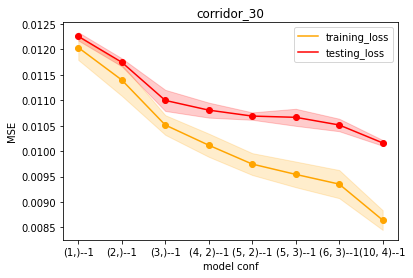

In [8]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_30_results)
plot_results(corridor_30_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_30")

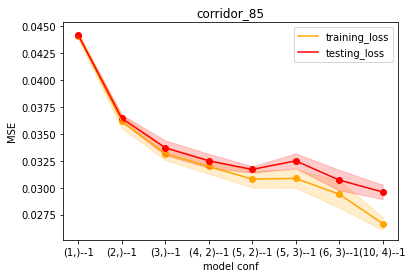

In [9]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_85_results)
plot_results(corridor_85_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_85")

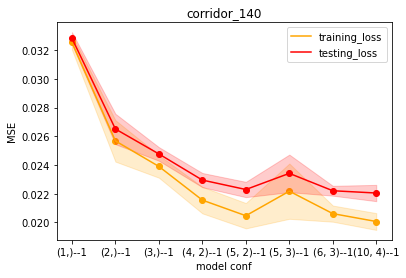

In [10]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_140_results)
plot_results(corridor_140_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_140")

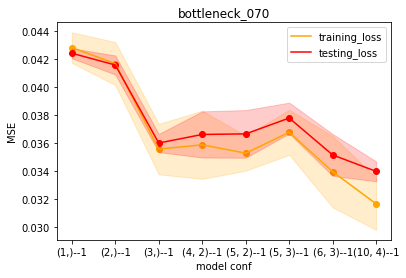

In [11]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(bottleneck_070_results)
plot_results(bottleneck_070_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="bottleneck_070")

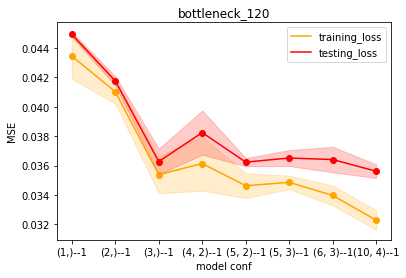

In [12]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(bottleneck_120_results)
plot_results(bottleneck_120_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="bottleneck_120")

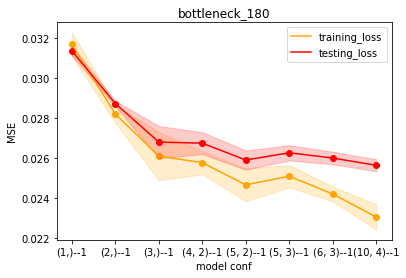

In [13]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(bottleneck_180_results)
plot_results(bottleneck_180_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="bottleneck_180")

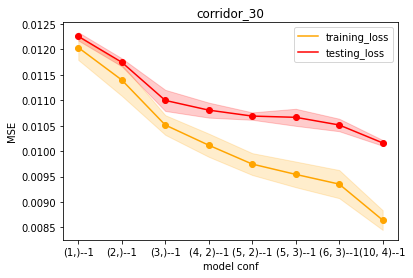

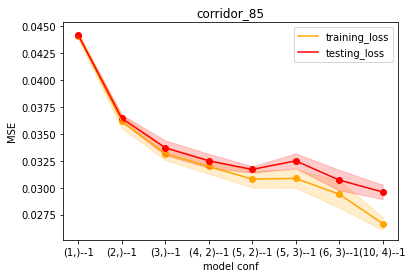

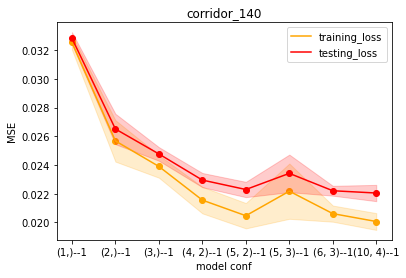

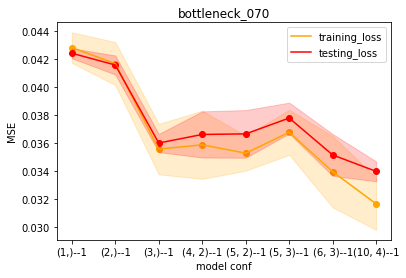

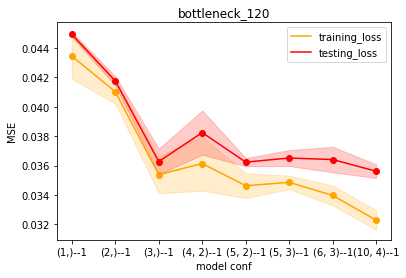

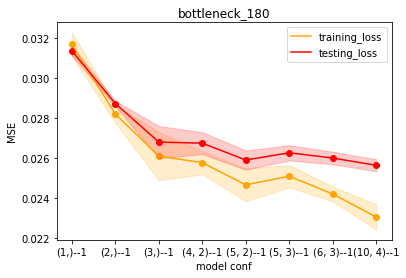

In [14]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_30_results)
plot_results(corridor_30_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_30")

tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_85_results)
plot_results(corridor_85_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_85")

tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_140_results)
plot_results(corridor_140_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_140")

tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(bottleneck_070_results)
plot_results(bottleneck_070_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="bottleneck_070")

tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(bottleneck_120_results)
plot_results(bottleneck_120_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="bottleneck_120")

tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(bottleneck_180_results)
plot_results(bottleneck_180_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="bottleneck_180")